# **Introduction et problématique**

Exploration des facteurs contribuant à l'attrition et à la performance des employés en entreprise. À partir de l'ensemble de données « IBM HR Analytics Employee Attrition & Performance », l'objectif est de mener une analyse approfondie afin de dégager des tendances et des corrélations susceptibles d'aider l'organisation à mieux comprendre les causes du turnover. Les informations obtenues contribueront à l'élaboration de stratégies visant à améliorer la satisfaction, la rétention et la performance globale des employés

# **16 pourcent des employés ont quitté l'entreprise: **

34 variables de départ à analyser dans le fichier origine IBM

# **Lecture des données et premier aperçu**

In [ ]:
#cellule 10
import pandas as pd

# Load the dataframe
# Using the raw file URL from GitHub
df = pd.read_csv('https://raw.githubusercontent.com/Rchess10/Hackathon_bootcamp_sept/main/IBM_HR_Employee_Attrition.csv')

DF=df.copy() #garder un original des données brutes

# Display basic information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# nettoyage éventuel des données: compléter les veleurs nulles

In [ ]:
#cellule 20
# Display descriptive statistics of the dataframe
display(df.describe())

# Display the sum of null values for each column
display(df.isnull().sum())

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


# **Nettoyer les fichiers: enlever les lignes inutiles, identifier les missing data**



In [ ]:
#cellule 30

# Drop columns that have constant values or are not relevant for the analysis
df_clean = df.drop([
    'EmployeeCount',  # Always '1'
    'EmployeeNumber', # Unique identifier, not useful for modeling
    'Over18',         # Always 'Y'
    'StandardHours',  # Always '80'
    'PerformanceRating' # Limited variability (3 or 4), less discriminant
], axis=1)

# Display the columns of the cleaned DataFrame
display(df_clean.columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
#cellule 32
# Check for duplicate rows
duplicate_rows = df_clean[df_clean.duplicated()]

if len(duplicate_rows) > 0:
    print("Duplicate rows found:")
    display(duplicate_rows)
else:
    print("No duplicate rows found.")

No duplicate rows found.


# **Conversion des data qualitatives en quantitatives**

In [ ]:
#cellule 33



# Encode categorical variables
df_encoded = pd.get_dummies(df_clean, columns=['JobRole'])

# Convert 'Attrition' to binary (Yes=1, No=0) and add it to df_clean
df_encoded['Attrition_binary'] = df_clean['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)


# Convert 'OverTime' to binary (Yes=1, No=0)
df_encoded['OverTime'] = df_encoded['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)

# Convert 'Attrition' to binary (Yes=1, No=0)
df_encoded['Attrition'] = df_encoded['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)


# Convert 'Travel_Rarely' to values (0= Non-Travel, 1= Travel_Rarely, 2= Travel_Frequently)
df_encoded['BusinessTravel'] = df_encoded['BusinessTravel'].apply(lambda x: 0 if x == 'Non-Travel' else 1 if x == 'Travel_Rarely' else 2)


# Display the first few rows of the encoded DataFrame
display(df_encoded.head())

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Attrition_binary
0,41,1,1,1102,Sales,1,2,Life Sciences,2,Female,...,False,False,False,False,False,False,False,True,False,1
1,49,0,2,279,Research & Development,8,1,Life Sciences,3,Male,...,False,False,False,False,False,False,True,False,False,0
2,37,1,1,1373,Research & Development,2,2,Other,4,Male,...,False,False,True,False,False,False,False,False,False,1
3,33,0,2,1392,Research & Development,3,4,Life Sciences,4,Female,...,False,False,False,False,False,False,True,False,False,0
4,27,0,1,591,Research & Development,2,1,Medical,1,Male,...,False,False,True,False,False,False,False,False,False,0


3. identification des données pertinentes / suppresssion des colonnes non pertinentes

variable à expliquer : Attrition

facteurs d'intérêt:
- age : à normaliser ou pas?
- business travel : à convertir 0/1/2 pour l'étudier
- department : analyse descriptive à faire
- distance from home : à normaliser ou pas?
- education:
- education field
- environnement satisfaction : 1/2/3/4
- gender : M/F à recoder en 1/2
- job involvement
- job level
- job role : health representative, technician,etc
- job satisfaction
- martial status
- monthly income
- numCompanyWorked : num
- overtime : heuresup Y/N  à convertir 0/1
- personalSalaryHike : augmentation de salaire 11à25%
- relation satisfaction : 1/2/3/4
- stockoptionlevel : 0/1/2/3 à correler avec nomthlyincome?
- totalworkingyears:au total dans la vie: de 0 à 40
- trainingtime lastyears : 0..6
- work life balance
- years at company : 0.;40
- years in current role : 0..18
- years since last promo : 0..15
- years with manager : 0..17

à garder pour essayer de les comprendre (François):
- dailyrate (info non comprise)
- hourlyrate : donnée pas comprise
- monthlyrate : facturation par IBM?

à supprimer:

- employee count : toujours à '1'
- employee number : toujours à'Y'
- over18 : toujours 'Y'
- performancerating : 3 ou 4, non discriminant, pas d'info à en tirer
- standardhours : toujours à '80'
-




questions possibles après l'observation des graphes:
- que des % svp, p les effectifs


- le role de manager est bien present dans tous les departement : si beoin pour justifier le fait d'etudier le facteur 'yearswith current manager"


- facteur departement : R&D 14%, sales 21% et RH 19 % :
  * est ce que cet ecart est significatif? test statistique du CHi²
  * est-ce que ce facteur est correlé avec 'envirenemnt satifaction ' et 'relationsatisfaction'

- attrition dans les roles:
  * attention : proportion par role : 40% des representatives sales partent, mais reprensentent 80 personne sur les 1500 employés: être vigilant sur l'interpretation

  autres questions:

  - est-ce que le genre peut etre un facteur d'attrition?






In [ ]:

#     Exploratory Data Analysis (EDA):
#     Perform a comprehensive analysis to understand the distribution of the data and identify key trends.
#     Visualize the distribution of attrition across different demographic and job-related variables, such as age, gender, education, job role, and department.

#     Explore how employee satisfaction (e.g., JobSatisfaction, EnvironmentSatisfaction) and work-life balance influence attrition rates.


# **Description des données**

In [ ]:
# Count employees by department and calculate percentage
department_counts = df_clean['Department'].value_counts().reset_index()
department_counts.columns = ['Department', 'Employee Count']
department_counts['Percentage (%)'] = (department_counts['Employee Count'] / department_counts['Employee Count'].sum()) * 100
print("Employee count and percentage by Department:")
display(department_counts)

# Count employees by job role and calculate percentage
job_role_counts = df_clean['JobRole'].value_counts().reset_index()
job_role_counts.columns = ['Job Role', 'Employee Count']
job_role_counts['Percentage (%)'] = (job_role_counts['Employee Count'] / job_role_counts['Employee Count'].sum()) * 100
print("\nEmployee count and percentage by Job Role:")
display(job_role_counts)

Employee count and percentage by Department:


,Department,Employee Count,Percentage (%)
0,Research & Development,961,65.374150
1,Sales,446,30.340136
2,Human Resources,63,4.285714



Employee count and percentage by Job Role:


,Job Role,Employee Count,Percentage (%)
0,Sales Executive,326,22.176871
1,Research Scientist,292,19.863946
2,Laboratory Technician,259,17.619048
3,Manufacturing Director,145,9.863946
4,Healthcare Representative,131,8.911565
5,Manager,102,6.938776
6,Sales Representative,83,5.646259
7,Research Director,80,5.442177
8,Human Resources,52,3.537415


Observation of the job roles representation among departments

In [ ]:
job_role_distribution = df_clean.groupby(['Department', 'JobRole']).size().reset_index(name='Count')

job_role_distribution['Percentage'] = job_role_distribution.groupby('Department')['Count'].transform(lambda x: x / x.sum() * 100)

display(job_role_distribution)

,Department,JobRole,Count,Percentage
0,Human Resources,Human Resources,52,82.539683
1,Human Resources,Manager,11,17.460317
2,Research & Development,Healthcare Representative,131,13.631634
3,Research & Development,Laboratory Technician,259,26.951093
4,Research & Development,Manager,54,5.619147
5,Research & Development,Manufacturing Director,145,15.088450
6,Research & Development,Research Director,80,8.324662
7,Research & Development,Research Scientist,292,30.385016
8,Sales,Manager,37,8.295964
9,Sales,Sales Executive,326,73.094170


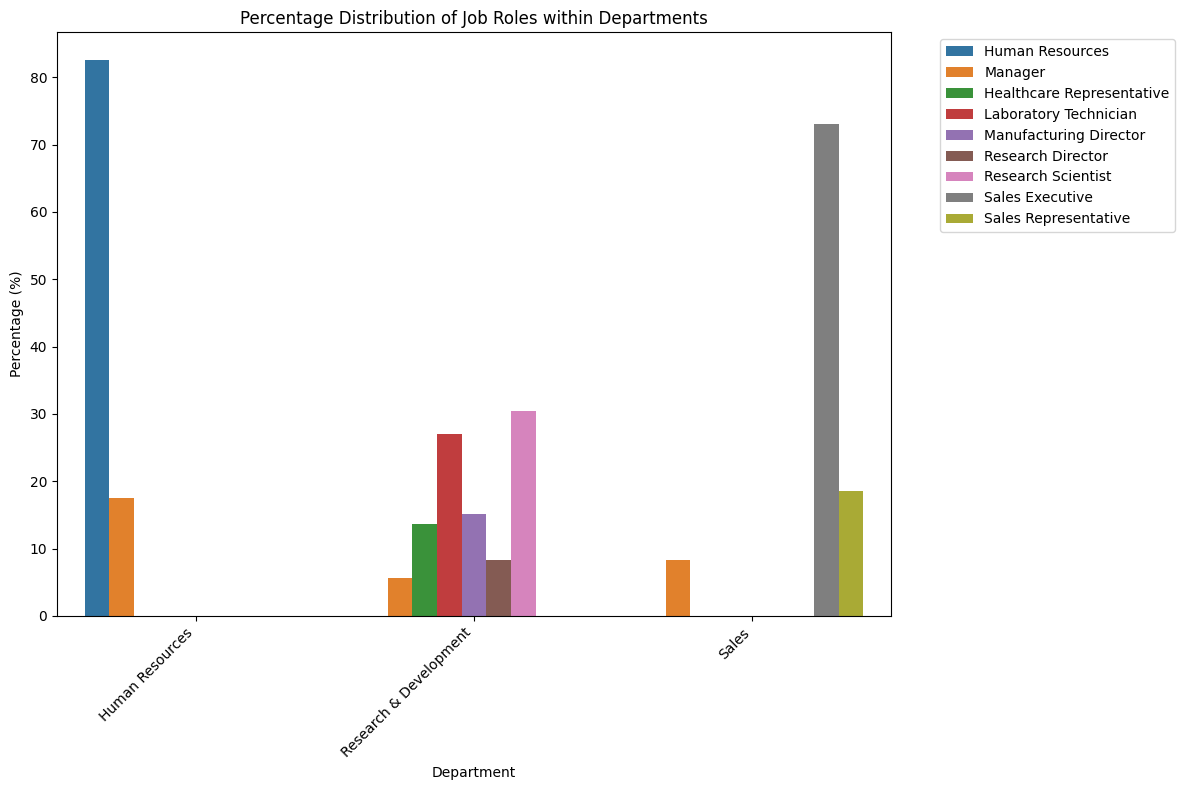

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(x='Department', y='Percentage', hue='JobRole', data=job_role_distribution)
plt.title("Percentage Distribution of Job Roles within Departments")
plt.xlabel("Department")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

A noter important pour la suite:
il n'y a de role "Human ressources" que dans le département "human ressources"
de rôle "Laboratory technician" que dans la R&D, et de rôle "sales executive" que dans le département "sales"

##Distribution by age

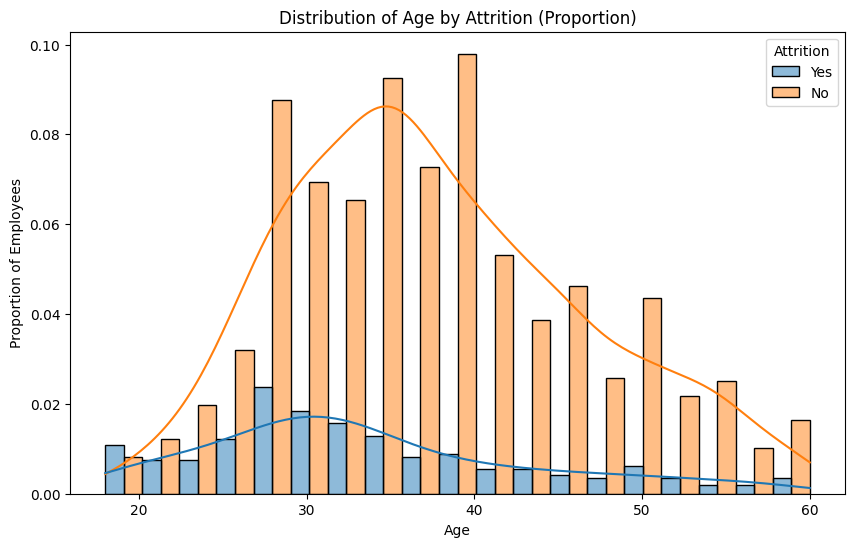

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_clean, x='Age', hue='Attrition', multiple='dodge', kde=True, stat='proportion')
plt.title('Distribution of Age by Attrition (Proportion)')
plt.xlabel('Age')
plt.ylabel('Proportion of Employees')
plt.show()

population plus stable quand l'âge croit: nous y reviendrons en conclusion

## Visualize attrition distribution by education

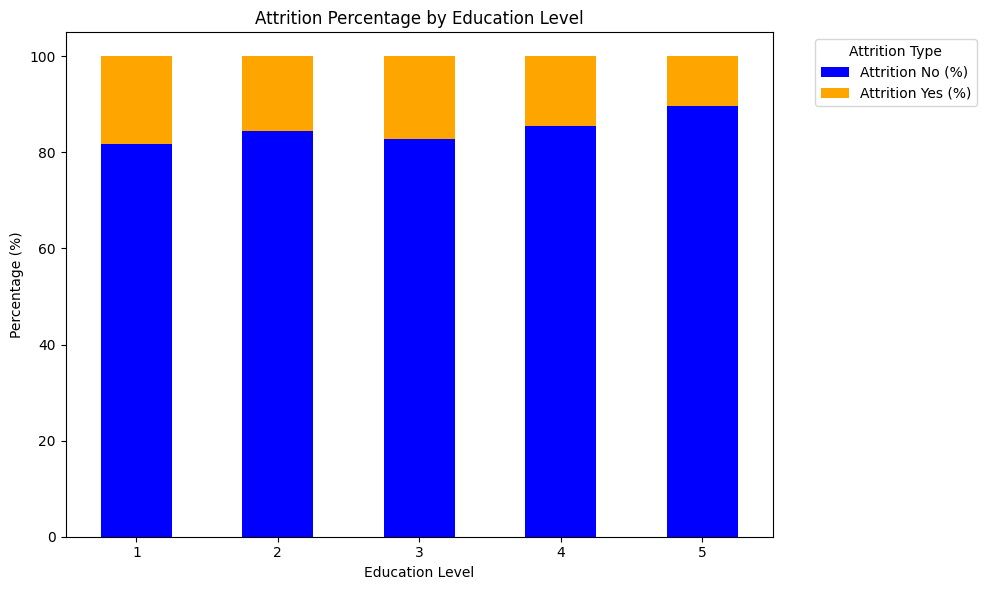

In [ ]:
# Count attrition by education level (Yes/No)
attrition_counts_by_education = df_clean.groupby(['Education', 'Attrition']).size().unstack(fill_value=0)

# Calculate percentages for stacked bar plot
attrition_counts_by_education['Total'] = attrition_counts_by_education['No'] + attrition_counts_by_education['Yes']
attrition_counts_by_education['Attrition No (%)'] = (attrition_counts_by_education['No'] / attrition_counts_by_education['Total']) * 100
attrition_counts_by_education['Attrition Yes (%)'] = (attrition_counts_by_education['Yes'] / attrition_counts_by_education['Total']) * 100


# Create a stacked bar plot
plt.figure(figsize=(10, 6))
attrition_counts_by_education[['Attrition No (%)', 'Attrition Yes (%)']].plot(kind='bar', stacked=True, color={'Attrition No (%)': 'blue', 'Attrition Yes (%)': 'orange'}, ax=plt.gca())
plt.title('Attrition Percentage by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Attrition Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

conclusion: a priori peu d'impact de l'éducation sur l'attrition

## Visualize attrition distribution by job role

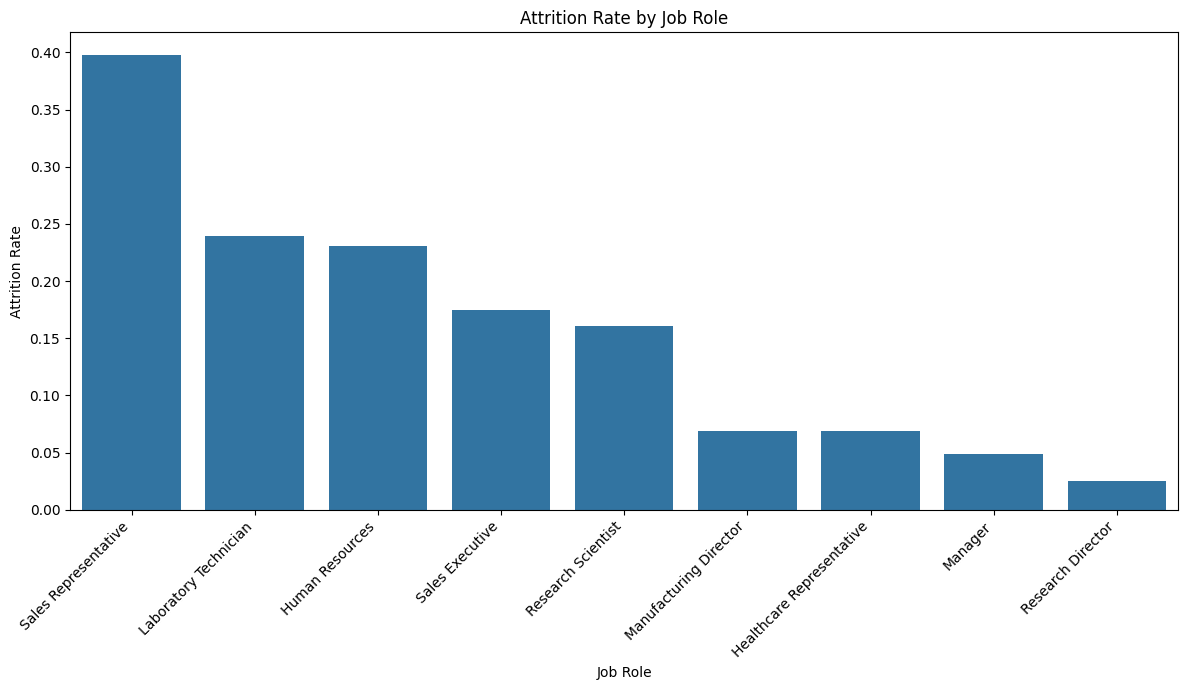

In [ ]:
# Calculate the attrition rate for each job role using df_clean
attrition_by_jobrole = df_clean.groupby('JobRole')['Attrition'].value_counts(normalize=True).unstack()['Yes'].sort_values(ascending=False).reset_index()
attrition_by_jobrole.columns = ['JobRole', 'Attrition Rate']

# Create a bar plot
plt.figure(figsize=(12, 7))
sns.barplot(x='JobRole', y='Attrition Rate', data=attrition_by_jobrole)
plt.title('Attrition Rate by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Attrition Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#à mettre en ordre decroissant
# mettre le niveau au dessus de lecture (divisé par le total)

Pourcentage of attrition per department

In [ ]:
# Count attrition by department (Yes/No)
attrition_counts_by_department = df_clean.groupby(['Department', 'Attrition']).size().unstack(fill_value=0)

# Calculate total employees per department
attrition_counts_by_department['Total'] = attrition_counts_by_department['No'] + attrition_counts_by_department['Yes']

# Calculate percentage of attrition (Yes) and non-attrition (No)
attrition_counts_by_department['Attrition No (%)'] = (attrition_counts_by_department['No'] / attrition_counts_by_department['Total']) * 100
attrition_counts_by_department['Attrition Yes (%)'] = (attrition_counts_by_department['Yes'] / attrition_counts_by_department['Total']) * 100

print("Attrition Counts and Percentages by Department:")
display(attrition_counts_by_department)

Attrition Counts and Percentages by Department:


Attrition,No,Yes,Total,Attrition No (%),Attrition Yes (%)
Department,,,,,
Human Resources,51,12,63,80.952381,19.047619
Research & Development,828,133,961,86.160250,13.839750
Sales,354,92,446,79.372197,20.627803


Percentage of attrition per Job role amont all employees

In [ ]:
# Calculate attrition rate by job role across all departments using df_clean
attrition_by_jobrole_overall = df_clean.groupby('JobRole')['Attrition'].agg(['mean', 'count']).reset_index()
attrition_by_jobrole_overall.columns = ['JobRole', 'Attrition_Rate_Within_JobRole', 'Employee_Count']

# Calculate the overall attrition rate using df_clean
overall_attrition_rate = df_clean['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0).mean()

# Calculate the variance from the average attrition rate
attrition_by_jobrole_overall['Variance_from_Overall_Average (%)'] = (attrition_by_jobrole_overall['Attrition_Rate_Within_JobRole'] - overall_attrition_rate) * 100

# Calculate the individual percentage of contribution of job role to the total attrition rate
total_attrition_count = df_clean['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0).sum()
attrition_by_jobrole_overall['Attrition_Count'] = df_clean.groupby('JobRole')['Attrition'].apply(lambda x: (x == 'Yes').sum()).values
attrition_by_jobrole_overall['Contribution_to_Total_Attrition (%)'] = (attrition_by_jobrole_overall['Attrition_Count'] / total_attrition_count) * 100


display(attrition_by_jobrole_overall)

TypeError: agg function failed [how->mean,dtype->object]

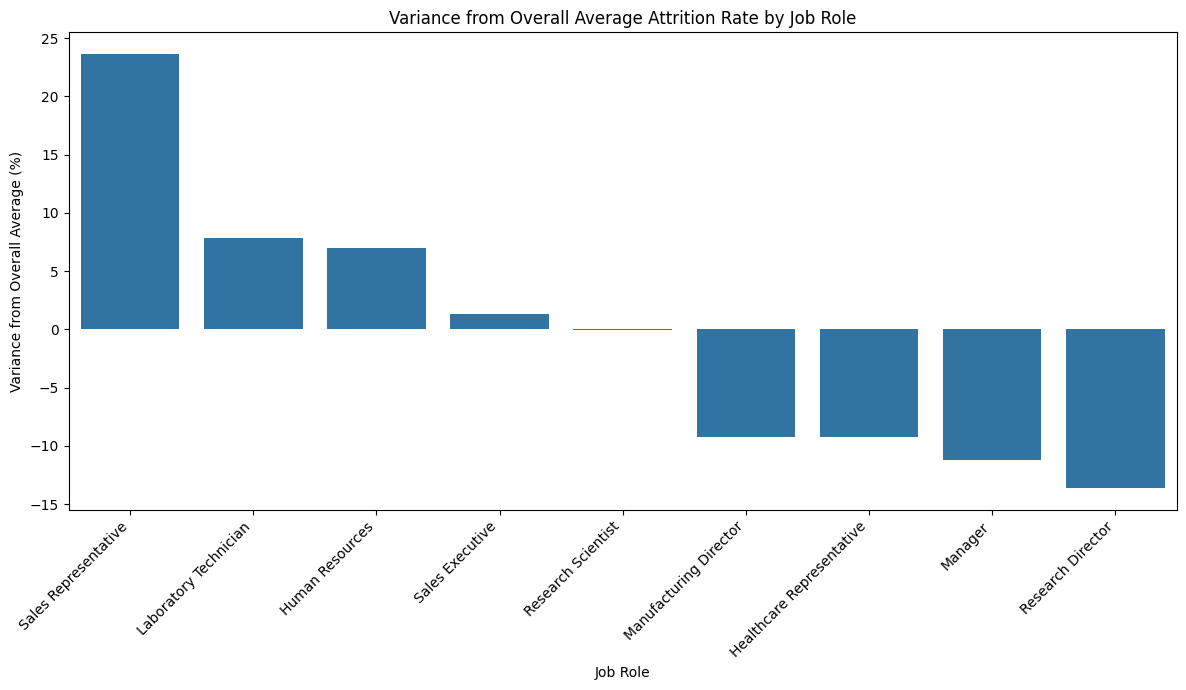

In [ ]:
plt.figure(figsize=(12, 7))
sns.barplot(x='JobRole', y='Variance_from_Overall_Average (%)', data=attrition_by_jobrole_overall.sort_values(by='Variance_from_Overall_Average (%)', ascending=False))
plt.title('Variance from Overall Average Attrition Rate by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Variance from Overall Average (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Graph of attribution by job role by department

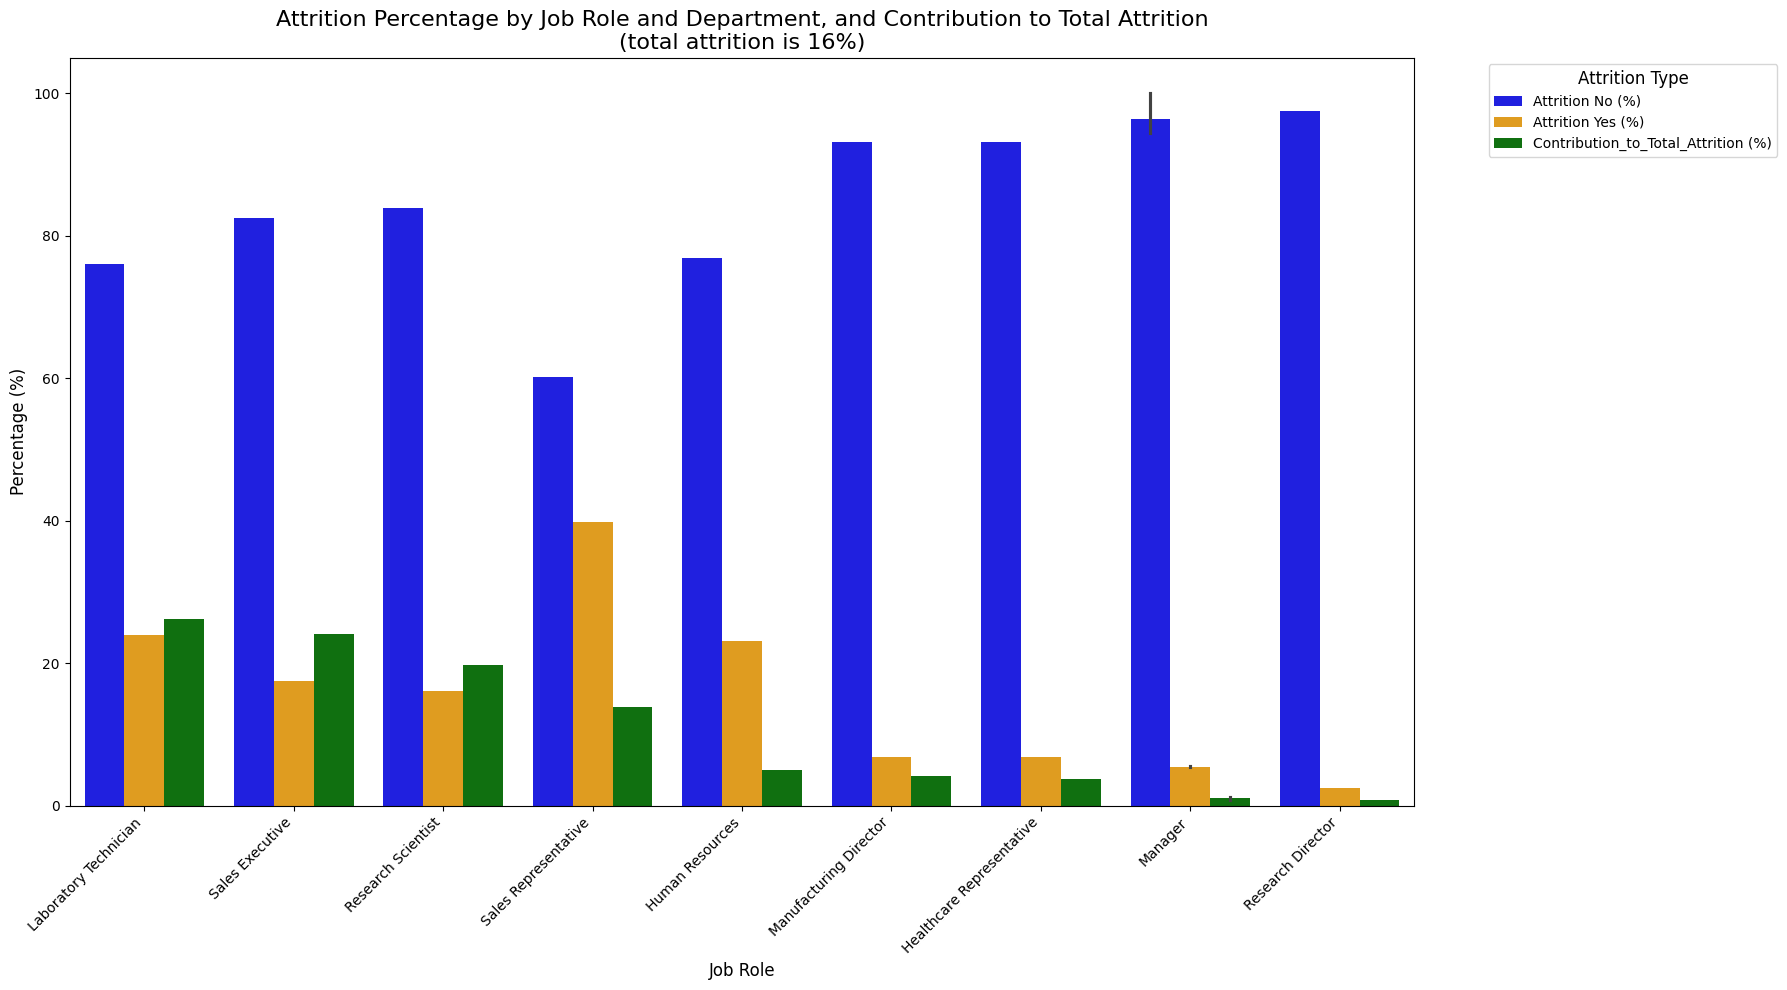

In [ ]:
# Calculate attrition by job role and department
attrition_counts_by_jobrole_dept = df_clean.groupby(['Department', 'JobRole', 'Attrition']).size().unstack(fill_value=0)

# Calculate percentages
attrition_counts_by_jobrole_dept['Total'] = attrition_counts_by_jobrole_dept['No'] + attrition_counts_by_jobrole_dept['Yes']
attrition_counts_by_jobrole_dept['Attrition No (%)'] = (attrition_counts_by_jobrole_dept['No'] / attrition_counts_by_jobrole_dept['Total']) * 100
attrition_counts_by_jobrole_dept['Attrition Yes (%)'] = (attrition_counts_by_jobrole_dept['Yes'] / attrition_counts_by_jobrole_dept['Total']) * 100

# Calculate the individual percentage of contribution of job role to the total attrition rate
total_attrition_count = df_clean['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0).sum()

# Ensure 'Yes' column exists before calculating contribution
if 'Yes' in attrition_counts_by_jobrole_dept.columns:
    attrition_counts_by_jobrole_dept['Contribution_to_Total_Attrition (%)'] = (attrition_counts_by_jobrole_dept['Yes'] / total_attrition_count) * 100
else:
    # Handle the case where there are no 'Yes' attrition cases
    attrition_counts_by_jobrole_dept['Contribution_to_Total_Attrition (%)'] = 0

# Melt the dataframe for plotting
melted_attrition = attrition_counts_by_jobrole_dept[['Attrition No (%)', 'Attrition Yes (%)', 'Contribution_to_Total_Attrition (%)']].reset_index().melt(
    id_vars=['Department', 'JobRole'], var_name='Attrition Type', value_name='Percentage'
)

# Sort the melted dataframe by 'Contribution_to_Total_Attrition (%)' in descending order
contribution_melted = melted_attrition[melted_attrition['Attrition Type'] == 'Contribution_to_Total_Attrition (%)'].sort_values(by='Percentage', ascending=False)
overall_contribution_sort = contribution_melted['JobRole'].tolist()
combined_melted = melted_attrition[melted_attrition['JobRole'].isin(overall_contribution_sort)]


plt.figure(figsize=(18, 10))
# Filter out rows where Percentage is 0 before plotting
sns.barplot(data=combined_melted[combined_melted['Percentage'] > 0], x='JobRole', y='Percentage', hue='Attrition Type', order=overall_contribution_sort, palette={'Attrition Yes (%)': 'orange', 'Attrition No (%)': 'blue', 'Contribution_to_Total_Attrition (%)': 'green'})
plt.title('Attrition Percentage by Job Role and Department, and Contribution to Total Attrition\n(total attrition is 16%)', fontsize=16)
plt.xlabel('Job Role', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Attrition Type', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

By analysing the variance from the overall percentage of attrition, we can identify 3 job role which are particulary affected: Sales representative, Laboratory Technician, Sales executives.

### Insights or Next Steps

Would be interesting to dig further on those three to identify the causes.


## Summary:

### Data Analysis Key Findings

*   The distribution of age for employees who attrited shows a concentration in younger age groups compared to those who did not attrit.
*   The attrition rate varies across education levels, with specific levels potentially showing higher or lower rates than others.
*   The attrition rate differs significantly across various job roles.




Standardisation des variables numériques 'Age', 'MonthlyIncome' et 'DistanceFromHome' avec des valeurs entre 1 et 100 pour la visualitation et l'exploration statistique des données.

--> création de df_clean_std avec 3 nouvelles colonnes 'Age_std', 'MonthlyIncome_std' et 'DistanceFromHome_std' à partir des variables 'Age', 'MonthlyIncome', et 'DistanceFromHome' standardisées entre 1 et 100. Il y aura donc 3 colonnes de plus dans df_clean_std que dans df_clean.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Create a copy of df_clean to create the new dataframe df_clean_std
df_clean_std = df_clean.copy()

# Initialize the MinMaxScaler to scale between 1 and 100
scaler = MinMaxScaler(feature_range=(1, 100))

# Select the variables to standardize
variables_to_standardize = ['Age', 'MonthlyIncome', 'DistanceFromHome']

# Apply standardization and create new columns with '_std' suffix
for var in variables_to_standardize:
    df_clean_std[f'{var}_std'] = scaler.fit_transform(df_clean_std[[var]])

# Display the first few rows of the new df_clean_std dataframe with the new standardized columns
display(df_clean_std.head())

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_std,MonthlyIncome_std,DistanceFromHome_std
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,8,0,1,6,4,0,5,55.214286,26.982938,1.000000
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,10,3,3,10,7,1,7,74.071429,22.483886,25.750000
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,7,3,3,0,0,0,0,45.785714,6.635545,4.535714
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,8,3,3,8,7,3,0,36.357143,10.905213,8.071429
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,6,3,3,2,2,2,2,22.214286,13.819431,4.535714


questions possibles après l'observation des graphes:

que des % svp, p les effectifs

le role de manager est bien present dans tous les departement : si besoin pour justifier le fait d'etudier le facteur 'yearswith current manager"

facteur departement : R&D 14%, sales 21% et RH 19 % :

est ce que cet ecart est significatif? test statistique du CHi²
est-ce que ce facteur est correlé avec 'envirenemnt satifaction ' et 'relationsatisfaction'
attrition dans les roles:

attention : proportion par role : 40% des representatives sales partent, mais reprensentent 80 personne sur les 1500 employés: être vigilant sur l'interpretation
autres questions:

est-ce que le genre peut etre un facteur d'attrition?

matrice de correlation:
- verifier si les correlations identifiées sont significative (test t -student -> François)  
- créer un indicateur à partir des facteurs explicatifs corrélés, et faire un est du chi2 (Cécile)

Standardisation des variables numériques 'Age', 'MonthlyIncome' et 'DistanceFromHome' avec des valeurs entre 1 et 100 pour la visualitation et l'exploration statistique des doonnées.

--> création de df_clean_std avec 3 nouvelles colonnes 'Age_std', 'MonthlyIncome_std' et 'DistanceFromHome_std' à partir des variables 'Age', 'MonthlyIncome', et 'DistanceFromHome' standardisées entre 1 et 100. Il y aura donc 3 colonnes de plus dans df_clean_std que dans df_clean.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Create a copy of df_clean to create the new dataframe df_clean_std
df_clean_std = df_clean.copy()

# Convert 'Attrition' to binary (Yes=1, No=0) in df_clean_std
df_clean_std['Attrition'] = df_clean_std['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)


# Initialize the MinMaxScaler to scale between 1 and 100
scaler = MinMaxScaler(feature_range=(1, 100))

# Select the variables to standardize
variables_to_standardize = ['Age', 'MonthlyIncome', 'DistanceFromHome']

# Apply standardization and create new columns with '_std' suffix
for var in variables_to_standardize:
    df_clean_std[f'{var}_std'] = scaler.fit_transform(df_clean_std[[var]])

# Display the first few rows of the new df_clean_std dataframe with the new standardized columns
display(df_clean_std.head())

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_std,MonthlyIncome_std,DistanceFromHome_std
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,8,0,1,6,4,0,5,55.214286,26.982938,1.000000
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,10,3,3,10,7,1,7,74.071429,22.483886,25.750000
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,7,3,3,0,0,0,0,45.785714,6.635545,4.535714
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,8,3,3,8,7,3,0,36.357143,10.905213,8.071429
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,6,3,3,2,2,2,2,22.214286,13.819431,4.535714


## Analyse de la relation entre l'attrition et le département

suite au calcul des pourcentages de départ (attrition = yes) par département, on étudie de plus près le facteur départemnt :

répartition de l'attrition par departement : R&D 14%, sales 21% et RH 19 % de départ 'attrition=0'

Pour déterminer si l'ecart entre les département est significatif, nous réalisons un test statistique du CHi².


In [ ]:
# Create a contingency table of Attrition and Department
contingency_table_dept = pd.crosstab(df_clean['Attrition'], df_clean['Department'])

# Display the contingency table
print("Contingency Table: Attrition vs Department")
display(contingency_table_dept)

Contingency Table: Attrition vs Department


Department,Human Resources,Research & Development,Sales
Attrition,,,
No,51,828,354
Yes,12,133,92


<Figure size 800x600 with 0 Axes>

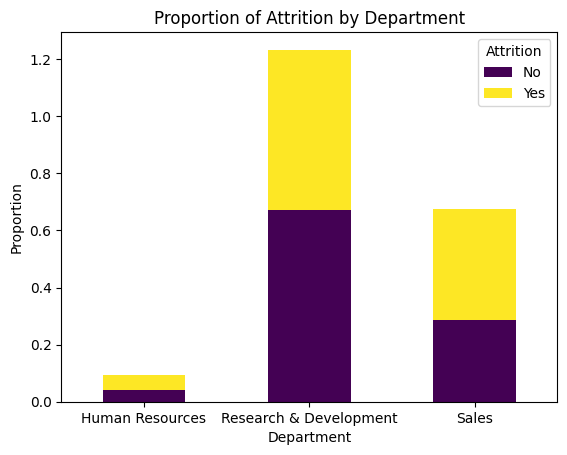

In [ ]:
# Calculate proportions for visualization
contingency_table_dept_prop = contingency_table_dept.div(contingency_table_dept.sum(axis=1), axis=0)

# Plot the proportions
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
contingency_table_dept_prop.T.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Proportion of Attrition by Department')
plt.xlabel('Department')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Attrition', labels=['No', 'Yes'])
plt.show()

Le graphique en barres montre la différence de proportion d'attrition entre les départements 'Human Resources', 'Research & Development', and 'Sales' departments.

In [ ]:
from scipy.stats import chi2_contingency

# Perform the Chi-squared test on the contingency table
chi2, p, dof, expected = chi2_contingency(contingency_table_dept)

# Print the results
print("Chi-squared test for Attrition vs Department:")
print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
display(expected)

Chi-squared test for Attrition vs Department:
Chi-squared statistic: 10.79600732241067
P-value: 0.004525606574479633
Degrees of freedom: 2
Expected frequencies:


array([[ 52.84285714, 806.06326531, 374.09387755],
       [ 10.15714286, 154.93673469,  71.90612245]])

conclusion intermédiaire:


Le test du Khi-deux indique une valeur de p de 0.004 < 0.05
Nous pouvons conclure à une relation statistiquement significative entre le facteur 'Department' et la variable cible 'Attrition'. Cela signifie que la répartition de l'attrition n'est pas la même d'un département à l'autre.

Nous ne réalisons pas d'avantage de etests statistique, mais le graphique suggère que le département Sales est le plus touché par les départs.


In [ ]:
#     Correlation and Trend Analysis:
#     Analyze correlations between employee attributes (e.g., Education, JobSatisfaction, WorkLifeBalance) and attrition rates.
#     Investigate trends in performance ratings across different job roles and departments.

#     Create cross-tabulations and heatmaps to visualize relationships between key variables,
#     such as DistanceFromHome by JobRole and Attrition, or MonthlyIncome by
#     Education and Attrition.



In [ ]:
#     Visualization:
#     Use Matplotlib and Seaborn to create insightful visualizations that effectively communicate the findings.
#     Examples include bar plots, box plots, and heatmaps. Or you can directly create them with Tableau or PowerBI.

#     Create an interactive dashboard using Tableau or PowerBI to allow for dynamic exploration of the data and insights.

#     Bonus: Retention Strategy Development:
#     Based on the analysis, propose actionable strategies to reduce employee attrition.
#     Consider factors such as improving job satisfaction, enhancing work-life balance, and providing targeted support to high-risk groups.



In [ ]:
# Deliverables:

# Participants are expected to submit a comprehensive report detailing their exploratory data analysis,
# data preprocessing steps, and key findings. Additionally, a presentation should be prepared to showcase visualizations
# and offer recommendations based on the insights. An interactive dashboard is optional but can enhance the presentation of results.

# Evaluation Criteria:

# Judges will assess submissions based on the depth of analysis, creativity in exploring correlations and trends,
# the clarity and effectiveness of visualizations, and the practicality and impact of the recommendations for reducing employee attrition
# and enhancing performance.

# **examen des différents paramètres qunatitatifs pour voir ceux qui peuvent être corrélés**

afin de diminuer le noombre d'analyses à faire

In [ ]:
df_numerical_encoded = df_encoded.select_dtypes(include=['int64', 'float64', 'uint8'])
correlation_matrix = df_numerical_encoded.corr()
display(correlation_matrix.head())

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_binary
Age,1.000000,-0.159205,-0.011807,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,...,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089,-0.159205
Attrition,-0.159205,1.000000,0.127006,-0.056652,0.077924,-0.031373,-0.103369,-0.006846,-0.130016,-0.169105,...,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199,1.000000
BusinessTravel,-0.011807,0.127006,1.000000,-0.015539,-0.009696,-0.008670,-0.011310,-0.004164,0.029300,-0.011696,...,0.008926,-0.028257,0.007972,0.016357,0.004209,0.005212,-0.005336,0.005222,-0.000229,0.127006
DailyRate,0.010661,-0.056652,-0.015539,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,...,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363,-0.056652
DistanceFromHome,-0.001686,0.077924,-0.009696,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,...,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406,0.077924


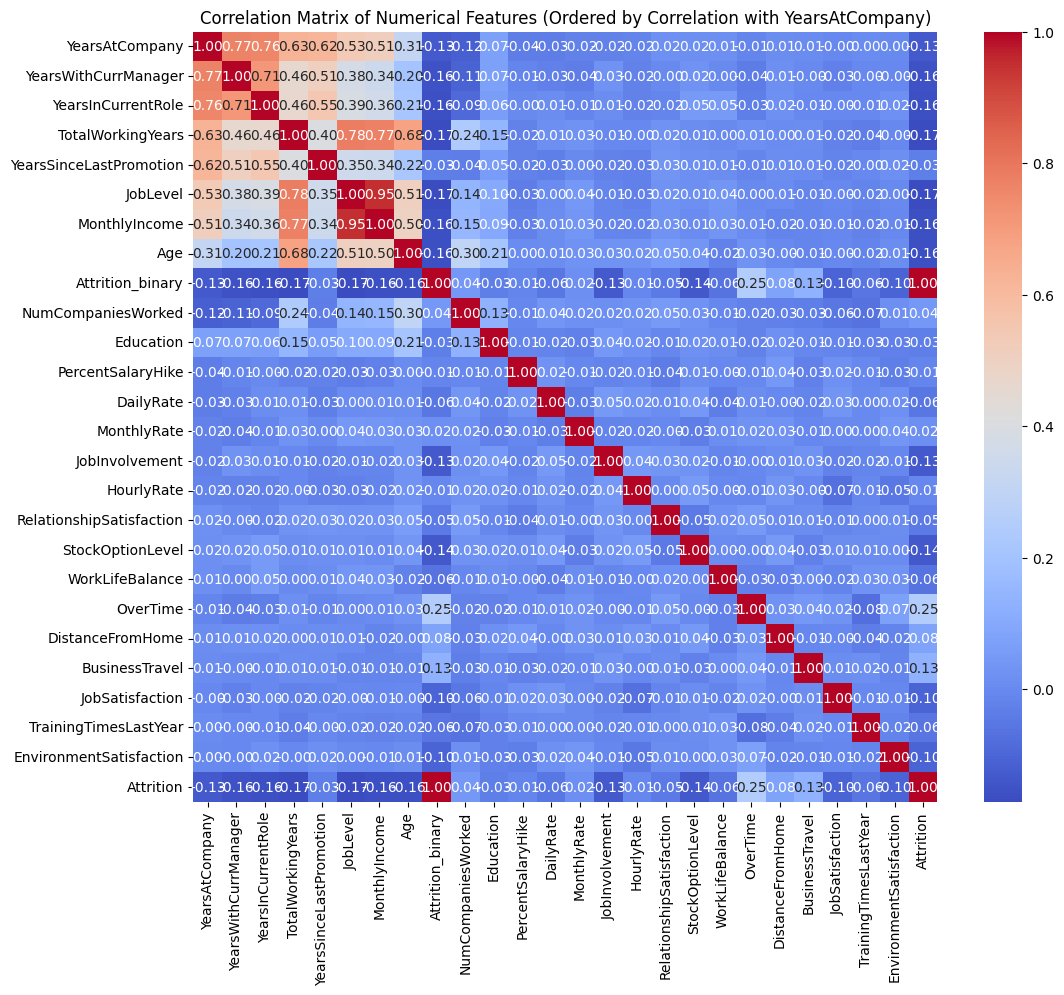

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the absolute correlations with YearsAtCompany
years_at_company_correlations = correlation_matrix['YearsAtCompany'].abs()

# Sort the columns by absolute correlation with YearsAtCompany in descending order,
# excluding YearsAtCompany itself and Attrition if it's in the columns
cols_to_sort = years_at_company_correlations.drop(['YearsAtCompany']).index.tolist()
if 'Attrition' in cols_to_sort:
    cols_to_sort.remove('Attrition')

sorted_cols = years_at_company_correlations[cols_to_sort].sort_values(ascending=False).index.tolist()

# Create the new order of columns
ordered_cols = ['YearsAtCompany'] + sorted_cols

# Include 'Attrition' at the end if it was present
if 'Attrition' in correlation_matrix.columns:
    ordered_cols.append('Attrition')


# Reindex the correlation matrix
correlation_matrix_ordered = correlation_matrix.reindex(index=ordered_cols, columns=ordered_cols)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_ordered, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Matrix of Numerical Features (Ordered by Correlation with YearsAtCompany)')
plt.show()

la heat map précédente a été recréee pour rassembler en haut à gauche les peramètres qui paraissent corrélés. nous allons vérifier maintenant aau moyen d'un Pearson si c'est le cas
Remarque: on a mis attrition en bas, sachant que le résultat n'est pas significatif puisque attrition n'a que deux valeurs

In [ ]:
from scipy.stats import pearsonr
import numpy as np

def calculate_pvalues(df):
    dfcols = pd.DataFrame(columns=df.columns, index=df.columns)
    for i in df.columns:
        for j in df.columns:
            r, p = pearsonr(df[i], df[j])
            dfcols.loc[i, j] = round(p, 4)
    return dfcols

p_values_matrix = calculate_pvalues(df_numerical_encoded)
display(p_values_matrix.head())

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_binary
Age,0.0,0.0,0.651,0.683,0.9485,0.0,0.6975,0.3521,0.2532,0.0,...,0.0401,0.1506,0.0,0.4522,0.4103,0.0,0.0,0.0,0.0,0.0
Attrition,0.0,0.0,0.0,0.0299,0.0028,0.2293,0.0001,0.7931,0.0,0.0,...,0.0787,0.0,0.0,0.0226,0.0142,0.0,0.0,0.2058,0.0,0.0
BusinessTravel,0.651,0.0,0.0,0.5516,0.7103,0.7398,0.6648,0.8733,0.2616,0.6541,...,0.7324,0.2789,0.7601,0.5309,0.8719,0.8417,0.838,0.8414,0.993,0.0
DailyRate,0.683,0.0299,0.5516,0.0,0.8485,0.5197,0.4819,0.3704,0.077,0.9095,...,0.7637,0.1063,0.5782,0.9251,0.1469,0.1919,0.7036,0.2029,0.3124,0.0299
DistanceFromHome,0.9485,0.0028,0.7103,0.8485,0.0,0.4202,0.538,0.2329,0.7365,0.839,...,0.8017,0.0855,0.8593,0.1569,0.3089,0.7157,0.4703,0.7008,0.581,0.0028


calcul des Pearson deux à deux, en excluant évidemment les comparaisons d'un paramètre avec lui même

In [ ]:
# Define significance level and correlation threshold
alpha = 0.05
correlation_threshold = 0.3

# Store significant correlations and p-values
significant_correlations = []

# Iterate through the correlation matrix and p-values matrix
for i in correlation_matrix.index:
    for j in correlation_matrix.columns:
        correlation = correlation_matrix.loc[i, j]
        p_value = p_values_matrix.loc[i, j]

        # Check for significant correlation and exclude diagonal
        if abs(correlation) > correlation_threshold and p_value < alpha and i != j:
            significant_correlations.append({
                'Variable 1': i,
                'Variable 2': j,
                'Correlation': correlation,
                'P-value': p_value
            })

# Convert the list to a DataFrame for better display
significant_correlations_df = pd.DataFrame(significant_correlations)

# Display the significant correlations
display(significant_correlations_df)

,Variable 1,Variable 2,Correlation,P-value
0,Age,JobLevel,0.509604,0.0
1,Age,MonthlyIncome,0.497855,0.0
2,Age,TotalWorkingYears,0.680381,0.0
3,Age,YearsAtCompany,0.311309,0.0
4,Attrition,Attrition_binary,1.000000,0.0
5,JobLevel,Age,0.509604,0.0
6,JobLevel,MonthlyIncome,0.950300,0.0
7,JobLevel,TotalWorkingYears,0.782208,0.0
8,JobLevel,YearsAtCompany,0.534739,0.0
9,JobLevel,YearsInCurrentRole,0.389447,0.0


recensement des corrélations fortes

In [ ]:
print("Significant Correlations (Absolute Correlation > 0.3 and P-value < 0.05):")
display(significant_correlations_df)

Significant Correlations (Absolute Correlation > 0.3 and P-value < 0.05):


,Variable 1,Variable 2,Correlation,P-value
0,Age,JobLevel,0.509604,0.0
1,Age,MonthlyIncome,0.497855,0.0
2,Age,TotalWorkingYears,0.680381,0.0
3,Age,YearsAtCompany,0.311309,0.0
4,Attrition,Attrition_binary,1.000000,0.0
5,JobLevel,Age,0.509604,0.0
6,JobLevel,MonthlyIncome,0.950300,0.0
7,JobLevel,TotalWorkingYears,0.782208,0.0
8,JobLevel,YearsAtCompany,0.534739,0.0
9,JobLevel,YearsInCurrentRole,0.389447,0.0


Conclusion partielle de l'analyse des corrélations:

D'après l'analyse de corrélation de Pearson, avec une corrélation absolue supérieure à 0,6 et une valeur de p inférieure à 0,05, les variables suivantes présentent une corrélation statistiquement significative avec le nombre d'années dans l'entreprise 'yeasAtCompany':

Nombre total d'années de travail (0,63)
Nombre d'années dans le poste actuel (0,76)
Nombre d'années avec le responsable actuel (0,77)
Nombre d'années depuis la dernière promotion (0,62)

Ces corrélations suggèrent une forte corrélation entre l'ancienneté dans l'entreprise et les facteurs liés à l'expérience professionnelle globale, à l'ancienneté et à la rémunération.

#**Analyse statistique de la relation entre attrition et stabilité de carrière**



La matrice corrélation, puis les tests statistiques, ont montré que la variable YearsAtCompany est significativement corrélée avec les variables:
-YearsInCurrentRole
-YearsSinceLastPromotion
-YearsWithCurrManager

L'objectif est de :
1) vérifier séparément l’effet de ces 4 variables sur l’attrition avec des tests de student pour échantillons indépendants
2) créer un index global représentant la stabilité professionnelle moyenne qui reflète la corrélation significative entre ces variables: CareerStabilityIndex (CSI); les étapes de création de cet index sont:
    - standardisation des 4 variables corrélées
    - index= moyenne simple de ces 4 variables corrélées
3) tester l'influence de l'index CSI sur l'attrition


In [ ]:
# Import des librairies
import pandas as pd
from scipy import stats
from sklearn.preprocessing import StandardScaler

# Sélection des 4 variables continues
factors = ['YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

# Convert 'Attrition' to binary (Yes=1, No=0)
# df_clean_std['Attrition'] = df_clean_std['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0) # This line is redundant

# Vérification rapide
print(df_clean_std[factors + ['Attrition']].head())

# Boucle sur chaque facteur
# statistiques t, les p-values et indique si la différence est significative (p < 0.05).
for col in factors:
    group_yes = df_clean_std[df_clean_std['Attrition'] == 1][col].dropna()
    group_no = df_clean_std[df_clean_std['Attrition'] == 0][col].dropna()

    # Test de Student pour échantillons indépendants
    t_stat, p_value = stats.ttest_ind(group_yes, group_no, equal_var=False)

    print(f"Facteur : {col}")
    print(f"  Moyenne (Attrition=1): {group_yes.mean():.2f}")
    print(f"  Moyenne (Attrition=0): {group_no.mean():.2f}")
    print(f"  t = {t_stat:.3f}, p = {p_value:.4f}")
    print("  ➜ Significatif" if p_value < 0.05 else "  ➜ Non significatif")
    print("-" * 50)

   YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0               6                   4                        0   
1              10                   7                        1   
2               0                   0                        0   
3               8                   7                        3   
4               2                   2                        2   

   YearsWithCurrManager  Attrition  
0                     5          1  
1                     7          0  
2                     0          1  
3                     0          0  
4                     2          0  
Facteur : YearsAtCompany
  Moyenne (Attrition=1): 5.13
  Moyenne (Attrition=0): 7.37
  t = -5.283, p = 0.0000
  ➜ Significatif
--------------------------------------------------
Facteur : YearsInCurrentRole
  Moyenne (Attrition=1): 2.90
  Moyenne (Attrition=0): 4.48
  t = -6.847, p = 0.0000
  ➜ Significatif
--------------------------------------------------
Facteur : YearsSinceL

# creation de l'index stabilité de carrière

1) standardisation des variables d'interêt

La standardisation met les variables sur une même échelle (moyenne = 0, écart-type = 1).

L’indice de stabilité de carrière est la moyenne de ces valeurs standardisées :

des valeurs négatives indiquent une stabilité inférieure à la moyenne des employés.

2) Index de stabilité de carrière CarreerStabilityIndex (CSI) calculer comme la moyenne des variables standardisées

In [ ]:
# creation de l'index
# # standardisation des variables d'interêt
# La standardisation met les variables sur une même échelle (moyenne = 0, écart-type = 1).
# L’indice de stabilité de carrière est la moyenne de ces valeurs standardisées :
# des valeurs négatives indiquent une stabilité inférieure à la moyenne des employés.

scaler = StandardScaler()
df_clean_std[factors] = scaler.fit_transform(df_clean_std[factors])

# Calcul de la moyenne standardisée for the selected factors only
df_clean_std['CareerStabilityIndex'] = df_clean_std[factors].mean(axis=1)

# Vérification rapide
print(df_clean_std[['CareerStabilityIndex']].head())

   CareerStabilityIndex
0             -0.165305
1              0.422833
2             -1.036766
3              0.005789
4             -0.521684


comparer statistique de la moyenne du nouvel index entre les deux groupes (Attrition = 1 vs 0).

In [ ]:
group_yes = df_clean_std[df_clean_std['Attrition'] == 1]['CareerStabilityIndex']
group_no = df_clean_std[df_clean_std['Attrition'] == 0]['CareerStabilityIndex']

t_stat, p_value = stats.ttest_ind(group_yes, group_no, equal_var=False)

print("Test sur CareerStabilityIndex")
print(f"  Moyenne (Attrition=1): {group_yes.mean():.2f}")
print(f"  Moyenne (Attrition=0): {group_no.mean():.2f}")
print(f"  t = {t_stat:.3f}, p = {p_value:.4f}")
print("  ➜ Significatif" if p_value < 0.05 else "  ➜ Non significatif")


Test sur CareerStabilityIndex
  Moyenne (Attrition=1): -0.28
  Moyenne (Attrition=0): 0.05
  t = -5.556, p = 0.0000
  ➜ Significatif


visualisation

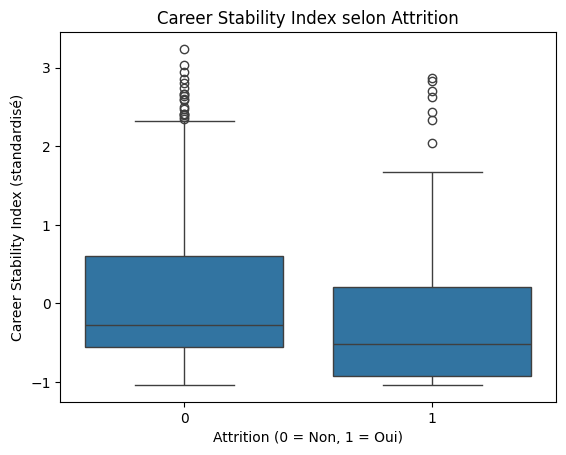

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Attrition', y='CareerStabilityIndex', data=df_clean_std)
plt.title('Career Stability Index selon Attrition')
plt.xlabel('Attrition (0 = Non, 1 = Oui)')
plt.ylabel('Career Stability Index (standardisé)')
plt.show()


In [ ]:
import numpy as np
import pandas as pd

taxonomie=np.array([
  ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
  'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
   'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel',
   'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
   'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
  'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
   'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
   ['Student', 'référence', 'chi2', 'Student', 'traitement différent',
  'Student', 'chi2', 'traitement différent', 'traitement différent', 'traitement différent',
    'chi2', 'à voir', 'n', 'chi2', 'chi2',
  'traitement différent', 'chi2', 'chi2', 'Student', 'Student',
    'Student', 'traitement différent', 'à voir', 'Student', 'chi2',
    'chi2', 'traitement différent', 'chi2', 'Student', 'Student',
    'chi2', 'déjà traité', 'déjà traité', 'déjà traité', 'déjà traité']])
print(taxonomie)


[['Age' 'Attrition' 'BusinessTravel' 'DailyRate' 'Department'
  'DistanceFromHome' 'Education' 'EducationField' 'EmployeeCount'
  'EmployeeNumber' 'EnvironmentSatisfaction' 'Gender' 'HourlyRate'
  'JobInvolvement' 'JobLevel' 'JobRole' 'JobSatisfaction' 'MaritalStatus'
  'MonthlyIncome' 'MonthlyRate' 'NumCompaniesWorked' 'Over18' 'OverTime'
  'PercentSalaryHike' 'PerformanceRating' 'RelationshipSatisfaction'
  'StandardHours' 'StockOptionLevel' 'TotalWorkingYears'
  'TrainingTimesLastYear' 'WorkLifeBalance' 'YearsAtCompany'
  'YearsInCurrentRole' 'YearsSinceLastPromotion' 'YearsWithCurrManager']
 ['Student' 'référence' 'chi2' 'Student' 'traitement différent' 'Student'
  'chi2' 'traitement différent' 'traitement différent'
  'traitement différent' 'chi2' 'à voir' 'n' 'chi2' 'chi2'
  'traitement différent' 'chi2' 'chi2' 'Student' 'Student' 'Student'
  'traitement différent' 'à voir' 'Student' 'chi2' 'chi2'
  'traitement différent' 'chi2' 'Student' 'Student' 'chi2' 'déjà traité'
  'déjà tr

Le tableau "taxonomie" ci-dessus a une première ligne avec les paramètres, une seconde avec les actions correspondant aux paramètres. si l'action est "Student" (valeurs numériques), on fera des tests de student pour chacune des variables par rapport à attrition, on calcule les valeurs critiques de T, on les compare avec le T obtenu, et on fait un tableau par ordre décroissant de corrélation avec également le résultat du test

In [ ]:
from scipy.stats import ttest_ind, t

# Extract variables marked as 'Student' from the taxonomie array
student_variables = [taxonomie[0][i] for i in range(len(taxonomie[1])) if taxonomie[1][i] == 'Student']

# Perform t-tests for 'Student' variables against 'Attrition'
ttest_student_results = []
alpha = 0.05 # Significance level

for col in student_variables:
    if col in df_encoded.columns:
        group1 = df_encoded[df_encoded['Attrition'] == 1][col]
        group2 = df_encoded[df_encoded['Attrition'] == 0][col]

        # Ensure there are enough observations in both groups for the test
        if len(group1.dropna()) > 1 and len(group2.dropna()) > 1:
            t_stat, p_value = ttest_ind(group1, group2, nan_policy='omit')
            correlation = df_encoded['Attrition'].corr(df_encoded[col])

            # Calculate degrees of freedom
            n1 = len(group1.dropna())
            n2 = len(group2.dropna())
            dof = n1 + n2 - 2

            # Calculate critical t-value
            if dof > 0:
                critical_t_value = t.ppf(1 - alpha/2, dof)
                is_significant = abs(t_stat) > critical_t_value
            else:
                critical_t_value = None
                is_significant = False


            ttest_student_results.append({
                'Variable': col,
                'T-statistic': t_stat,
                'P-value': p_value,
                'Correlation': correlation,
                'Degrees of Freedom': dof,
                'Critical T-value (alpha=0.05)': critical_t_value,
                'Significant (abs(T-stat) > Critical T)': is_significant
            })
        else:
             print(f"Skipping t-test for '{col}' due to insufficient observations in one or both groups.")
    else:
        print(f"Variable '{col}' not found in the dataframe.")


ttest_student_results_df = pd.DataFrame(ttest_student_results)

# Sort by absolute correlation in descending order
ttest_student_results_df['Abs_Correlation'] = ttest_student_results_df['Correlation'].abs()
ttest_student_results_df = ttest_student_results_df.sort_values(by='Abs_Correlation', ascending=False).drop(columns='Abs_Correlation')

print("T-test Results (Attrition vs 'Student' Numerical Variables) sorted by Absolute Correlation:")
display(ttest_student_results_df)

T-test Results (Attrition vs 'Student' Numerical Variables) sorted by Absolute Correlation:


,Variable,T-statistic,P-value,Correlation,Degrees of Freedom,Critical T-value (alpha=0.05),Significant (abs(T-stat) > Critical T)
7,TotalWorkingYears,-6.652255,4.061878e-11,-0.171063,1468,1.961581,True
3,MonthlyIncome,-6.203936,7.147364e-10,-0.159840,1468,1.961581,True
0,Age,-6.178664,8.356308e-10,-0.159205,1468,1.961581,True
2,DistanceFromHome,2.994708,2.793060e-03,0.077924,1468,1.961581,True
8,TrainingTimesLastYear,-2.282903,2.257850e-02,-0.059478,1468,1.961581,True
1,DailyRate,-2.174084,2.985816e-02,-0.056652,1468,1.961581,True
5,NumCompaniesWorked,1.668019,9.552526e-02,0.043494,1468,1.961581,False
4,MonthlyRate,0.581306,5.611236e-01,0.015170,1468,1.961581,False
6,PercentSalaryHike,-0.516457,6.056128e-01,-0.013478,1468,1.961581,False


pour les valeurs ordinales, on fait plutôt un test du CHI2

In [ ]:
from scipy.stats import chi2_contingency

# Extract variables marked as 'chi2' from the taxonomie array
chi2_variables = [taxonomie[0][i] for i in range(len(taxonomie[1])) if taxonomie[1][i] == 'chi2']

# Perform Chi-squared tests for 'chi2' variables against 'Attrition'
chi2_results = []
alpha = 0.05 # Significance level

for col in chi2_variables:
    if col in df_encoded.columns:
        # Create a contingency table
        contingency_table = pd.crosstab(df_encoded['Attrition'], df_encoded[col])

        # Perform the Chi-squared test
        if contingency_table.shape[0] > 1 and contingency_table.shape[1] > 1:
            chi2, p, dof, expected = chi2_contingency(contingency_table)

            chi2_results.append({
                'Variable': col,
                'Chi2-statistic': chi2,
                'P-value': p,
                'Degrees of Freedom': dof,
                'Significant (P-value < 0.05)': p < alpha
            })
        else:
            print(f"Skipping Chi-squared test for '{col}' due to insufficient dimensions in contingency table.")
    else:
        print(f"Variable '{col}' not found in the dataframe.")

chi2_results_df = pd.DataFrame(chi2_results)

# Sort by P-value in ascending order
chi2_results_df = chi2_results_df.sort_values(by='P-value')

print("Chi-squared Test Results (Attrition vs 'chi2' Categorical Variables) sorted by P-value:")
display(chi2_results_df)

Variable 'PerformanceRating' not found in the dataframe.
Chi-squared Test Results (Attrition vs 'chi2' Categorical Variables) sorted by P-value:


,Variable,Chi2-statistic,P-value,Degrees of Freedom,Significant (P-value < 0.05)
4,JobLevel,72.529013,6.634685e-15,4,True
8,StockOptionLevel,60.598301,4.379390e-13,3,True
6,MaritalStatus,46.163677,9.455511e-11,2,True
3,JobInvolvement,28.492021,2.863181e-06,3,True
0,BusinessTravel,24.182414,5.608614e-06,2,True
2,EnvironmentSatisfaction,22.503881,5.123469e-05,3,True
5,JobSatisfaction,17.505077,5.563005e-04,3,True
9,WorkLifeBalance,16.325097,9.725699e-04,3,True
7,RelationshipSatisfaction,5.241068,1.549724e-01,3,False
1,Education,3.073961,5.455253e-01,4,False


# **Conclusion 1: sur la stabilité de carrière**



L’analyse montre une relation significative entre la stabilité de carrière et l’attrition.
Les tests t révèlent que les employés ayant quitté l’entreprise ont en moyenne moins d’années d’ancienneté, moins d’années dans leur poste actuel et moins de temps avec leur manager.
L’Indice de Stabilité de Carrière (ISC), obtenu par la moyenne standardisée de ces quatre facteurs, confirme cette tendance :

plus l’CSI est élevé, plus la stabilité professionnelle est forte, et plus la probabilité d’attrition est faible.

Autrement dit, une stabilité de carrière plus faible est associée à un risque accru de départ.

plan d'action: le plan d'action est difficile, car cela veut dire grossièrement que "plus on est vieux, plus on est stable !"

# **Conclusion 2 sur les valeurs numériques**

hormis celles regroupées dans la stabilité de carrière, et avec un résultat de Student positif



In [ ]:

# le nombre total d'années travaillées et l'âge auraient peut-être pu être regroupè avec la stabilité de carrière
# sinon, par ordre décroissant

# item                    corrélation         plan d'action
# revenu mensuel          négative            augmenter les salaires
# distance de la maison   positive            faciliter les transports
# temps de fromation      négative            augmenter les temps de formation
# daily rate              négative            augmenter les daily rates
#


# Conclusion 3: sur les valeurs ordinales
 avec test chi2 positif

In [ ]:
# par ordre décroissant, on trouve
# le niveau de poste, le niveau de stock-options, le statut marital stable,
# l'engagement dans le travail, le nombre de voyages professionnels,
#  l'environnement professionnel, la satisfaction au travail,
# et l'équilibre avec la vie personnelle


# un plan d'action simple pourrait être de favoriser les voyages professionnels
#
#


# Conclusion 4; sur les valeurs O/N

nous n'avons pas eu le temps de voir un test pertinent entre deux variables O/N, donc pas de conclusion


# Conclusion 5: sur l'analyse des données.
 Ce qui ressort le plus nettement est qu'il faut faire des plans d'actions spécifiques sur certaines populations: 16% de la population totale est parti parmi lesquels:

23% des techniciens de laboratiore, avec une contribution d'un quart aux départs totaux

17% des reposnables des ventes, avec une contribution d'un quart aux départs totaux

15% des chercheurs, avec une contribution de 20% aux départ totaux

15% des représentants commerciaux, avec une contribution de 20% aux départ totaux
